# example with three classifier :

# LR || SVR || SGDClassifier ::

In [12]:
from sklearn.datasets import load_breast_cancer  
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.model_selection import LearningCurveDisplay

In [13]:
lin_ud = load_breast_cancer() 

df = pd.DataFrame (lin_ud.data, columns = lin_ud.feature_names)
df['target'] = lin_ud.target 

df.isnull().sum() ## no imputation needed :

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [14]:
x = df.iloc[: , :-1] 
y= df[['target']]

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split (
                x,y,test_size = 0.2, random_state = 42 )

In [15]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import mean_squared_error 

import warnings 
warnings.filterwarnings('ignore')

reg = LogisticRegression () 
svc = SVC()
sgd_cf = SGDClassifier ()

In [16]:
from sklearn.model_selection import cross_val_score ,KFold 
import sklearn

import optuna 

def objective_1(trial):

    C=trial.suggest_int('C',1,10)
    intercept_scaling=trial.suggest_int('intercept_scaling',1,10)
    max_iter=trial.suggest_int( 'max_iter',100,200)
    n_jobs=trial.suggest_int('n_jobs',1,2) 
    clf  = LogisticRegression ( 
                
                C =C , 
                intercept_scaling  =intercept_scaling,
                solver ='liblinear', 
                max_iter = max_iter,
                n_jobs = n_jobs 
                ) 
    acc = cross_val_score( clf , x,y, n_jobs= -1,error_score='raise', cv = 5 ).mean ()
    return acc 
        
def objective_2(trial):
    
    C=trial.suggest_int('C',1,10)
    kernel=trial.suggest_categorical('kernel',['linear','poly','rbf'])
    degree=trial.suggest_int('degree',1,4)
    gamma=trial.suggest_categorical( 'gamma',['scale','auto'])
        
    cache_size=trial.suggest_int('cache_size',200,300)
    max_iter=trial.suggest_int('max_iter',1,5) 
        
    clf = sklearn.svm.SVC( C  = C,
                         kernel  = kernel,
                         degree = degree,
                         gamma = gamma,
                         cache_size = cache_size,
                         max_iter  = max_iter )
    acc = cross_val_score( clf , x,y, n_jobs= -1,error_score='raise', cv = 5 ).mean ()
    return acc 

        
def objective_3(trial):
    loss=trial.suggest_categorical( 'loss',['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge',        'perceptron', 'squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'])
    penalty=trial.suggest_categorical ('penalty',['l2','l1'])
        
    max_iter=trial.suggest_int('max_iter',500,1000)
    
    clf = SGDClassifier ( 
                             loss     = loss,
                             penalty   = penalty,
                             max_iter   = max_iter
                              ) 
   
    acc = cross_val_score( clf , x,y, n_jobs= -1,error_score='raise', cv = 5 ).mean ()
    return acc 

In [17]:
if __name__ == "__main__":
    study_1 = optuna.create_study(direction = 'maximize')
    study_1.optimize(objective_1 , n_trials= 10)

[I 2023-03-26 22:05:36,682] A new study created in memory with name: no-name-030c3dec-352f-4787-b5ca-d5483e72b250
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/s

[I 2023-03-26 22:05:37,194] Trial 3 finished with value: 0.9543238627542306 and parameters: {'C': 1, 'intercept_scaling': 8, 'max_iter': 189, 'n_jobs': 2}. Best is trial 0 with value: 0.956078248719143.
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [18]:
if __name__ == "__main__":
    study_2 = optuna.create_study(direction = 'maximize')
    study_2.optimize(objective_2 , n_trials= 10)

[I 2023-03-26 22:05:37,867] A new study created in memory with name: no-name-92135093-f381-4272-bd0c-e4f71ae18986
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solve

[I 2023-03-26 22:05:38,279] Trial 3 finished with value: 0.6498214562956062 and parameters: {'C': 9, 'kernel': 'rbf', 'degree': 4, 'gamma': 'auto', 'cache_size': 262, 'max_iter': 3}. Best is trial 2 with value: 0.7379909951870828.
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

In [19]:
if __name__ == "__main__":
    study_3 = optuna.create_study(direction = 'maximize')
    study_3.optimize(objective_3 , n_trials= 10)

[I 2023-03-26 22:05:38,768] A new study created in memory with name: no-name-b1df14f5-af05-4853-8be6-d7052f1298d4
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionW

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2023-03-26 22:05:41,506] Trial 9 finished with value: 0.46030119546654247 and parameters: {'loss': 'squared_epsilon_insensitive', 'penalty': 'l1', 'max_iter': 868}. Best is trial 6 with value: 0.9244216736531594.


In [20]:
print(study_1.best_params)
print(study_2.best_params)
print(study_3.best_params)

{'C': 3, 'intercept_scaling': 5, 'max_iter': 132, 'n_jobs': 1}
{'C': 9, 'kernel': 'rbf', 'degree': 1, 'gamma': 'scale', 'cache_size': 216, 'max_iter': 5}
{'loss': 'log', 'penalty': 'l1', 'max_iter': 604}


In [21]:
space_reg = [('standard_scaler',StandardScaler () ),
             ('reg',LogisticRegression(**study_1.best_params))]  

space_svc = [('standard_scaler',StandardScaler ( )),
             ('svc',sklearn.svm.SVC (**study_2.best_params))] 

space_sgd_cf = [('standard_scaler',StandardScaler () ),
             ('sgd_cv',SGDClassifier(**study_3.best_params))] 



In [22]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 

pipe_1 = Pipeline(space_reg).fit(x_train,y_train)
pipe_2 = Pipeline(space_svc).fit(x_train,y_train)
pipe_3 = Pipeline(space_sgd_cf).fit(x_train,y_train)

In [23]:
y_pred_reg = pipe_1.predict(x_test)
y_pred_svc = pipe_2.predict(x_test)
y_pred_sgd_cf = pipe_3.predict(x_test)

In [24]:
acc_reg = 1 - mean_squared_error (y_test,y_pred_reg)
acc_svc =1 -  mean_squared_error (y_test,y_pred_svc)
acc_sgd_cf =1-  mean_squared_error (y_test,y_pred_sgd_cf )

print( acc_reg)
print(acc_svc )
print( acc_sgd_cf)




0.9736842105263158
0.6929824561403508
0.9473684210526316


In [25]:
reg.fit(x_train,y_train)
svc.fit(x_train,y_train)
sgd_cf.fit(x_train,y_train) 

y_pred_reg_wp = reg.predict(x_test) #withot pipe line and without hpt 
y_pred_svc_wp = svc.predict(x_test)
y_pred_sgd_cf_wp = sgd_cf.predict(x_test)

In [26]:
acc_reg_wp = 1 - mean_squared_error (y_test,y_pred_reg_wp)
acc_svc_wp =1 -  mean_squared_error (y_test,y_pred_svc_wp)
acc_sgd_cf_wp =1-  mean_squared_error (y_test,y_pred_sgd_cf_wp)

print( acc_reg_wp)
print(acc_svc_wp)
print( acc_sgd_cf_wp)



0.956140350877193
0.9473684210526316
0.9473684210526316


In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

metrics_acc_reg =  confusion_matrix (y_test,y_pred_reg)
metrics_acc_svc =  confusion_matrix (y_test,y_pred_svc)
metrics_acc_sgd_cf =  confusion_matrix (y_test,y_pred_sgd_cf )

print( metrics_acc_reg)
print('\n')
print(metrics_acc_svc )
print('\n')
print( metrics_acc_sgd_cf)

[[41  2]
 [ 1 70]]


[[42  1]
 [34 37]]


[[41  2]
 [ 4 67]]


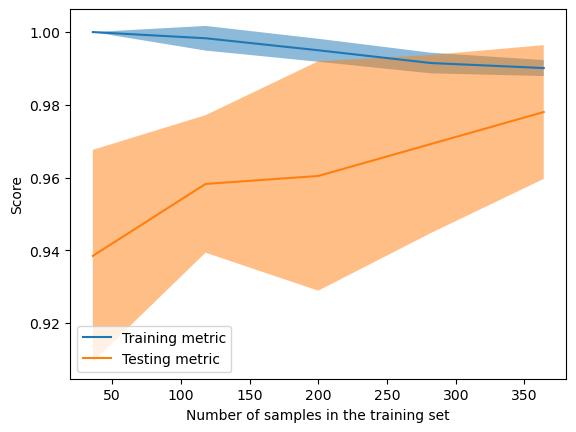

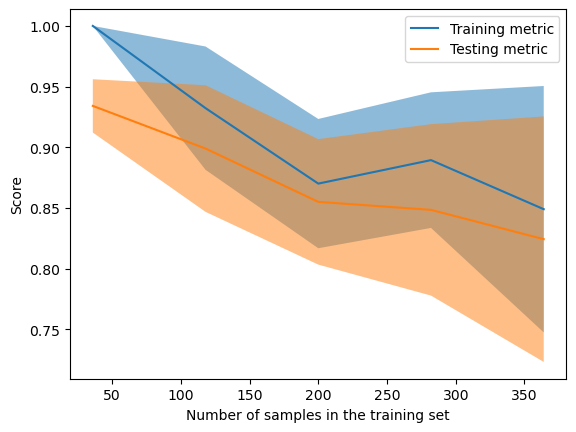

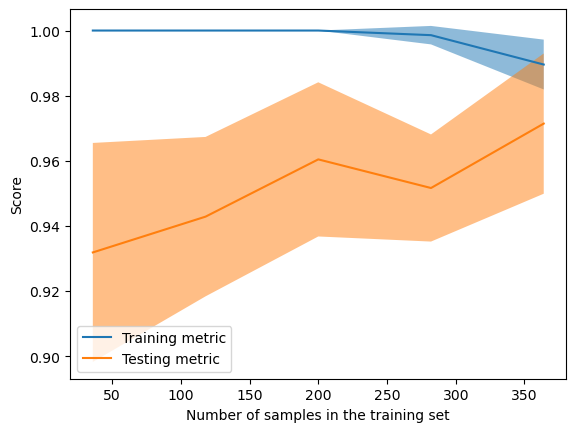

In [32]:
from sklearn.model_selection import LearningCurveDisplay 

lcd_1= LearningCurveDisplay.from_estimator(pipe_1,x_train,y_train,score_type='both')

lcd_2= LearningCurveDisplay.from_estimator(pipe_2,x_train,y_train,score_type='both')

lcd_3= LearningCurveDisplay.from_estimator(pipe_3,x_train,y_train,score_type='both')

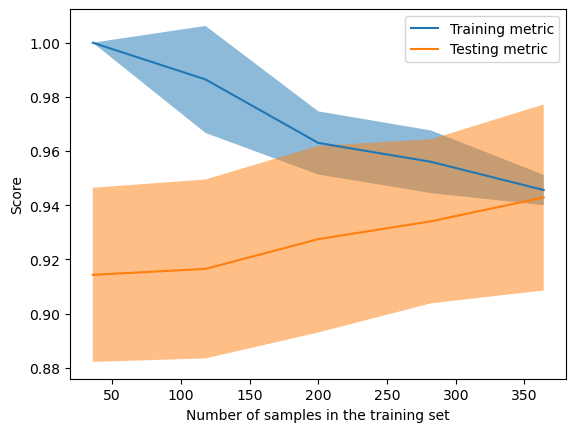

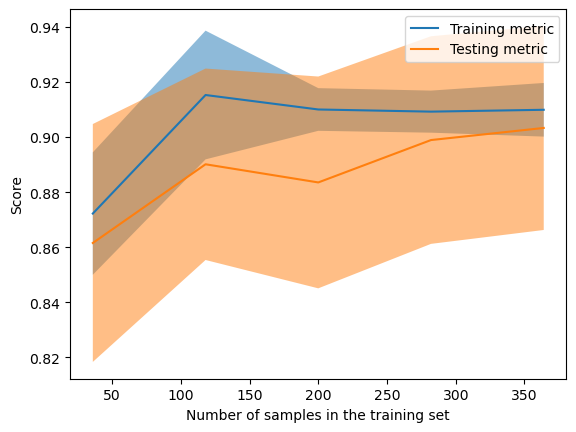

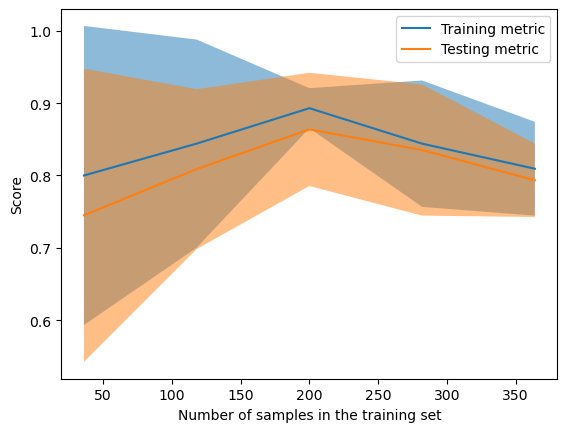

In [31]:
lcd_1_old= LearningCurveDisplay.from_estimator(reg,x_train,y_train,score_type='both')

lcd_2_old= LearningCurveDisplay.from_estimator(svc,x_train,y_train,score_type='both')

lcd_3_old= LearningCurveDisplay.from_estimator(sgd_cf,x_train,y_train,score_type='both')
